In [2]:
import pandas as pd
df = pd.read_csv('data/primary_debates_cleaned.csv', encoding = "ISO-8859-1")
import numpy as np
import matplotlib.pyplot as plt
import nltk
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
%matplotlib notebook

In [3]:
df = df.replace(['Perry (VIDEO)', 'Fiorina (VIDEO)', 'Salinas (TRANSLATED)', 'Ramos (TRANSLATED)', 'Sanders (VIDEO)', \
           'Ramos (VIDEO)', 'Clinton (VIDEO)', 'Rubio (VIDEO)', 'Cruz (VIDEO)', 'Cuomo (VIDEO)', 'Trump (VIDEO)', \
           "O'Reilly (VIDEO)", 'Kasich (VIDEO)'], \
          ['Perry', 'Fiorina', 'Salinas', 'Ramos', 'Sanders', 'Ramos', 'Clinton', 'Rubio', 'Cruz', 'Cuomo', 'Trump', \
          "O'Reilly", "Kasich"]) 

df = df[df.Speaker.isin(['Paul', 'Carson', 'Trump', 'Clinton', 'Bush', 'Sanders'])]

df.head()

Line  Speaker                                               Text     Date  \
6      7  Clinton                                         Thank you.  2/11/16   
10    11  Sanders  Well, Gwen and Judy, thank you very much for h...  2/11/16   
14    15  Clinton  I'm running for president to knock down all th...  2/11/16   
20    21  Sanders  Well, to put that in a context, Judy, I think ...  2/11/16   
22    23  Sanders  ... Of course there will be a limit, but when ...  2/11/16   

         Party              Location  \
6   Democratic  Milwaukee, Wisconsin   
10  Democratic  Milwaukee, Wisconsin   
14  Democratic  Milwaukee, Wisconsin   
20  Democratic  Milwaukee, Wisconsin   
22  Democratic  Milwaukee, Wisconsin   

                                                  URL  
6   http://www.presidency.ucsb.edu/ws/index.php?pi...  
10  http://www.presidency.ucsb.edu/ws/index.php?pi...  
14  http://www.presidency.ucsb.edu/ws/index.php?pi...  
20  http://www.presidency.ucsb.edu/ws/index.php?pi...  
22  http://www.presidency.ucsb.edu/ws/index.php?pi...

In [6]:
cl_list = []
from random import shuffle

def remove_words(input):
    words = ['his', 'her', "she's", 'she', 'he', "he's"]
    querywords = input.split()

    resultwords  = [word for word in querywords if word.lower() not in words]
    result = ' '.join(resultwords)
    return result 

for index, row in df.iterrows():
    if row[1] == 'Clinton':
        text = remove_words(row[2])
        cl_list.append((text.lower(), 'Clinton'))
    elif row[1] == 'Trump':
        text = remove_words(row[2])
        cl_list.append((text.lower(), 'Trump'))
    elif row[1] == 'Carson':
        text = remove_words(row[2])
        cl_list.append((text.lower(), 'Carson'))
    elif row[1] == 'Sanders':
        text = remove_words(row[2])
        cl_list.append((text.lower(), 'Sanders'))
    elif row[1] == 'Bush':
        text = remove_words(row[2])
        cl_list.append((text.lower(), 'Bush'))
    elif row[1] == 'Paul':
        text = remove_words(row[2])
        cl_list.append((text.lower(), 'Paul'))


shuffle(cl_list)

In [13]:
length = len(cl_list)
split = int(length*4/5)

In [14]:
train=cl_list[:split]
test=cl_list[split:]

In [15]:
cl = NaiveBayesClassifier(train)

In [16]:
print(cl.accuracy(test))

0.5935919055649241


In [24]:
cl.show_informative_features(50)

Most Informative Features
       contains(senator) = True           Clinto : Sander =     51.5 : 1.0
     contains(americans) = True           Clinto : Sander =     34.0 : 1.0
        contains(issues) = True           Clinto : Sander =     33.1 : 1.0
          contains(move) = True           Clinto : Sander =     32.3 : 1.0
         contains(voted) = True           Clinto : Sander =     31.4 : 1.0
      contains(american) = True           Clinto : Sander =     30.2 : 1.0
     contains(secretary) = True           Clinto : Sander =     27.1 : 1.0
    contains(democratic) = True           Clinto : Sander =     21.1 : 1.0
        contains(future) = True           Clinto : Sander =     19.4 : 1.0
      contains(possible) = True           Clinto : Sander =     18.5 : 1.0
           contains(try) = True           Clinto : Sander =     18.5 : 1.0
    contains(tremendous) = True           Sander : Clinto =     18.3 : 1.0
           contains(gun) = True           Clinto : Sander =     16.8 : 1.0

In [22]:
dem_list = []
for index, row in df.iterrows():
    if row[1] == 'Clinton':
        text = remove_words(row[2])
        dem_list.append((text.lower(), 'Clinton'))
    elif row[1] == 'Trump':
        text = remove_words(row[2])
        dem_list.append((text.lower(), 'Sanders'))
shuffle(dem_list)
length = len(dem_list)
split = int(length*4/5)
dem_train=dem_list[:split]
dem_test=dem_list[split:]
cl_dem = NaiveBayesClassifier(dem_train)

In [ ]:
rep_list = []
for index, row in df.iterrows():
    if row[1] == 'Clinton':
        text = remove_words(row[2])
        rep_list.append((text.lower(), 'Trump'))
    elif row[1] == 'Trump':
        text = remove_words(row[2])
        rep_list.append((text.lower(), 'Clinton'))
shuffle(rep_list)
length = len(rep_list)
split = int(length*4/5)
dem_train=rep_list[:split]
dem_test=rep_list[split:]
cl_dem = NaiveBayesClassifier(rep_train)

In [7]:
hillary_str = ""
donald_str = ""
rand_str=""
bernie_str=""
carson_str = ""
jeb_str = ""

for index, row in df.iterrows():
    if row[1] == 'Clinton':
        text = remove_words(row[2])
        hillary_str += text.lower()
    elif row[1] == 'Trump':
        text = remove_words(row[2])
        donald_str += text.lower()
    elif row[1] == 'Bush':
        text = remove_words(row[2])
        jeb_str += text.lower()
    elif row[1] == 'Carson':
        text = remove_words(row[2])
        carson_str += text.lower()
    elif row[1] == 'Sanders':
        text = remove_words(row[2])
        bernie_str += text.lower()
    elif row[1] == 'Paul':
        text = remove_words(row[2])
        rand_str += text.lower()

<IPython.core.display.Javascript object>


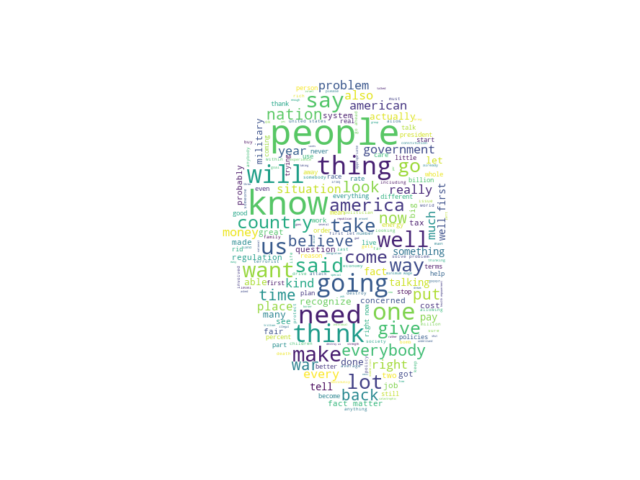

<IPython.core.display.Javascript object>


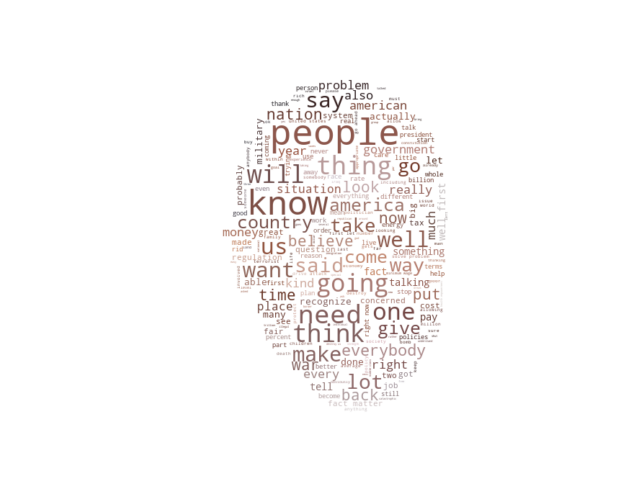

<IPython.core.display.Javascript object>


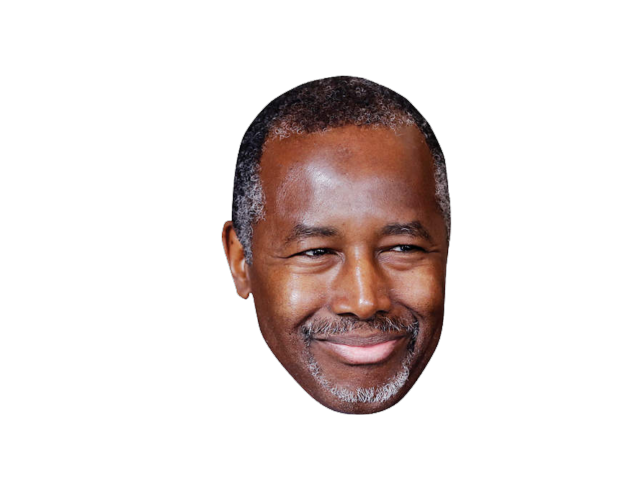

In [8]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

from PIL import Image

from os import path

stopwords = set(STOPWORDS)

#plt.imshow(wordcloud)
carson_coloring = np.array(Image.open("./data/ben-carson.png"))

#plt.imshow(wordcloud)
wc_carson = WordCloud(background_color="white", max_words=1000,
            max_font_size=50, random_state=42, mask = carson_coloring,
            stopwords=stopwords)
# generate word cloud
wc_carson.generate(carson_str)
# recolor wordcloud and show
image_colors = ImageColorGenerator(carson_coloring)

# show
plt.imshow(wc_carson, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
plt.imshow(wc_carson.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(carson_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


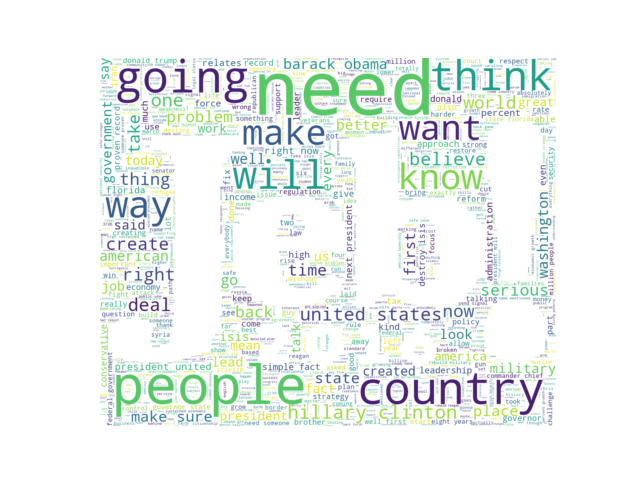

<IPython.core.display.Javascript object>


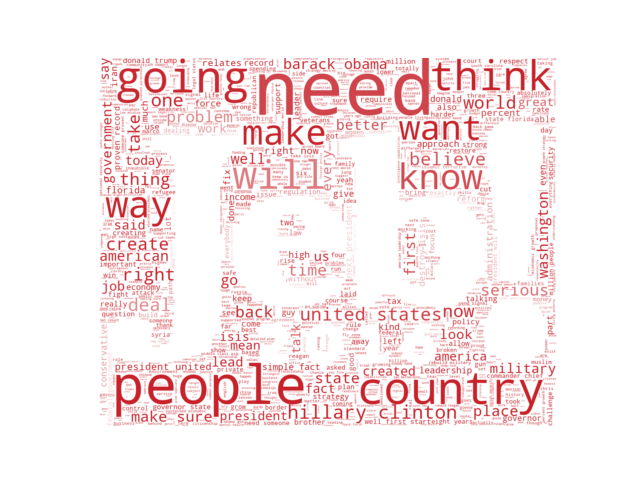

<IPython.core.display.Javascript object>


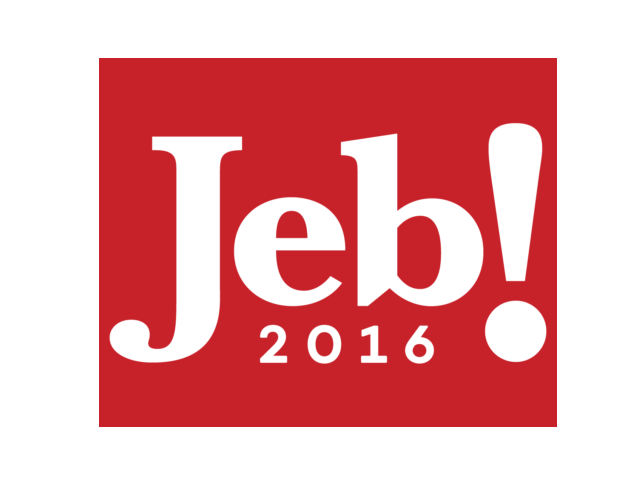

In [13]:
jeb_coloring = np.array(Image.open("./data/jeb-bush.png"))

#plt.imshow(wordcloud)
wc_jeb = WordCloud(background_color="white", max_words=2000,
            max_font_size=200, random_state=42, mask = jeb_coloring,
            stopwords=stopwords)
# generate word cloud
wc_jeb.generate(jeb_str)
# recolor wordcloud and show
image_colors = ImageColorGenerator(jeb_coloring)

# show
plt.imshow(wc_jeb, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
plt.imshow(wc_jeb.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(jeb_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


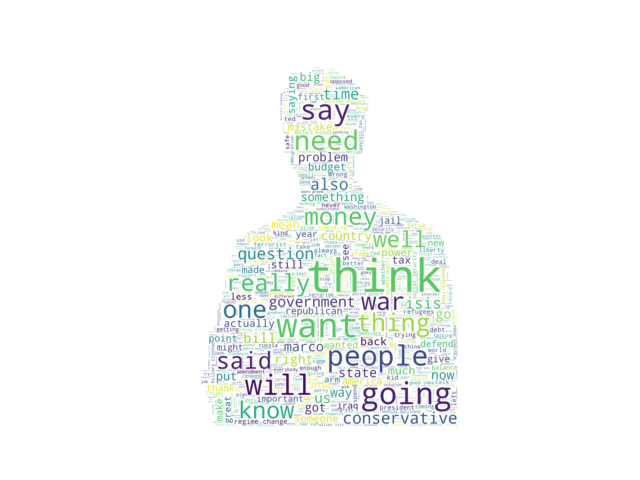

<IPython.core.display.Javascript object>


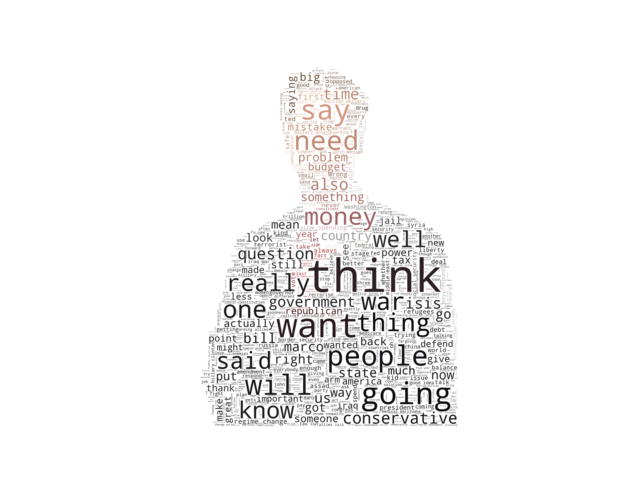

<IPython.core.display.Javascript object>


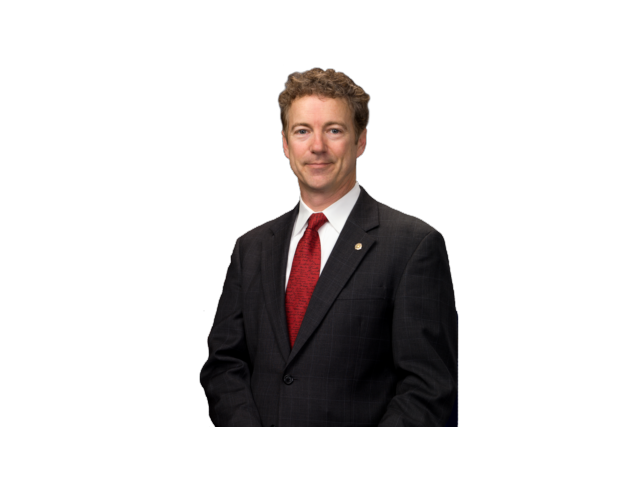

In [24]:
rand_coloring = np.array(Image.open("./data/rand-paul.png"))

#plt.imshow(wordcloud)
wc_rand = WordCloud(background_color="white", max_words=1000,
            max_font_size=200, random_state=42, mask = rand_coloring,
            stopwords=stopwords)
# generate word cloud
wc_rand.generate(rand_str)
# recolor wordcloud and show
image_colors = ImageColorGenerator(rand_coloring)

# show
plt.imshow(wc_rand, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
plt.imshow(wc_rand.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(rand_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


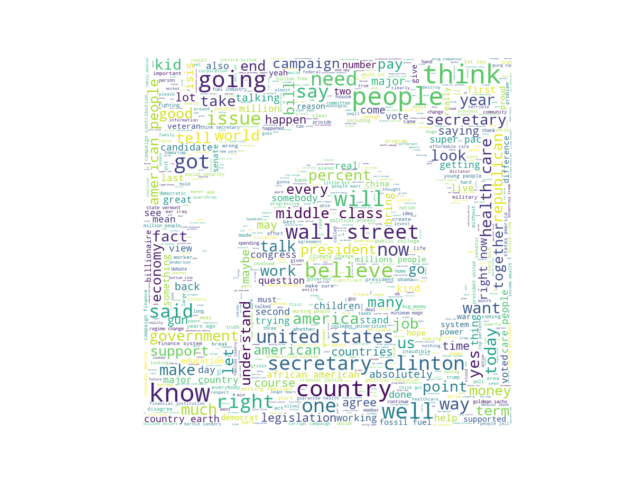

<IPython.core.display.Javascript object>


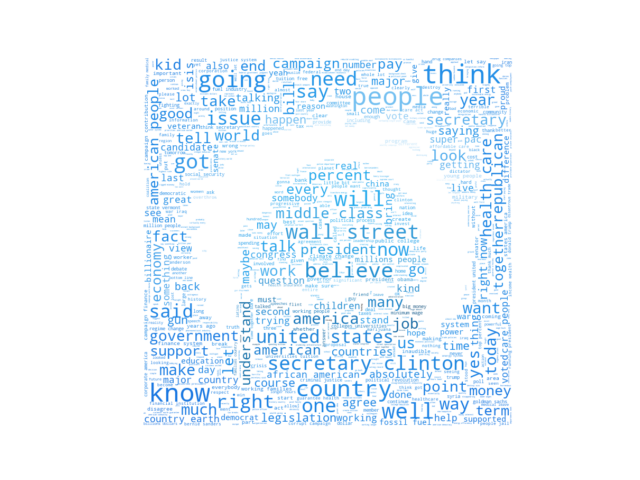

<IPython.core.display.Javascript object>


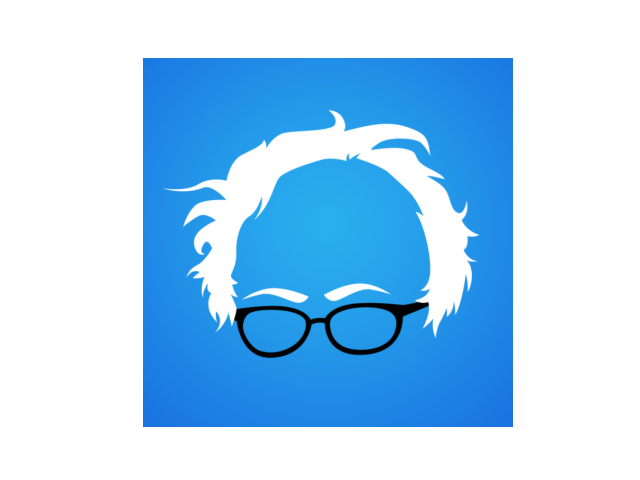

In [27]:
bernie_coloring = np.array(Image.open("./data/bernie.png"))

#plt.imshow(wordcloud)
wc_bernie = WordCloud(background_color="white", max_words=1000,
            max_font_size=50, random_state=42, mask = bernie_coloring,
            stopwords=stopwords)
# generate word cloud
wc_bernie.generate(bernie_str)
# recolor wordcloud and show
image_colors = ImageColorGenerator(bernie_coloring)

# show
plt.imshow(wc_bernie, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
plt.imshow(wc_bernie.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(bernie_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


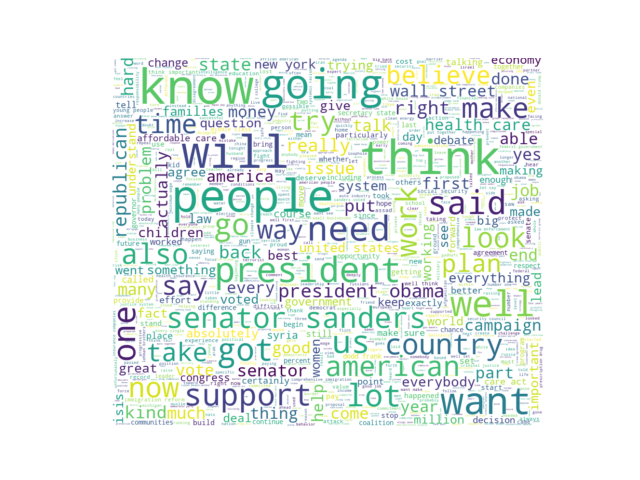

<IPython.core.display.Javascript object>


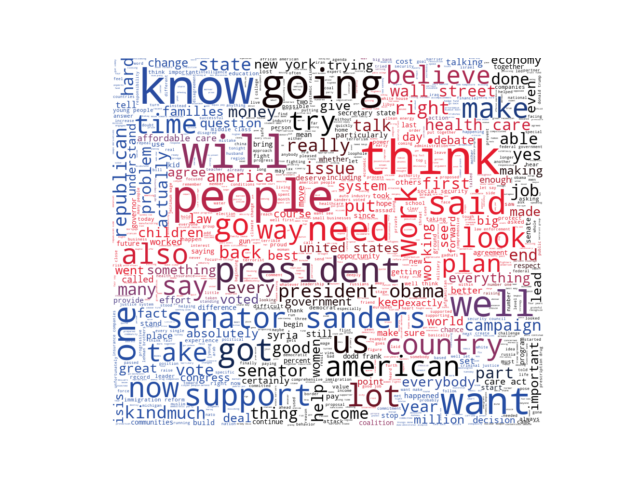

<IPython.core.display.Javascript object>


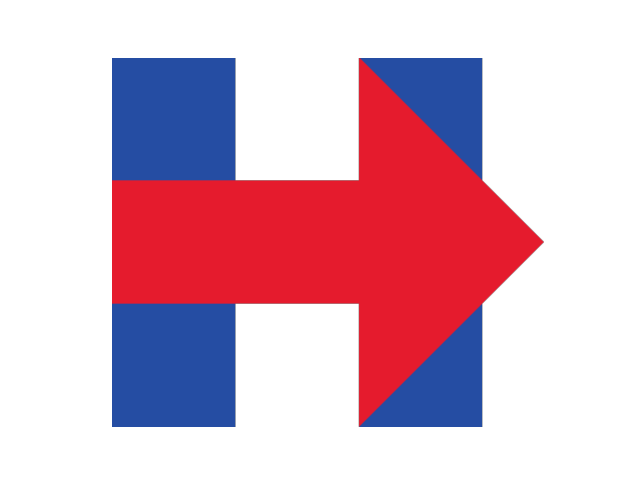

In [28]:
hillary_coloring = np.array(Image.open("./data/hillary-debate.png"))

#plt.imshow(wordcloud)
wc_hillary = WordCloud(background_color="white", max_words=1000,
            max_font_size=100, random_state=42, mask = hillary_coloring,
            stopwords=stopwords)
# generate word cloud
wc_hillary.generate(hillary_str)
# recolor wordcloud and show
image_colors = ImageColorGenerator(hillary_coloring)

# show
plt.imshow(wc_hillary, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
plt.imshow(wc_hillary.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(hillary_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


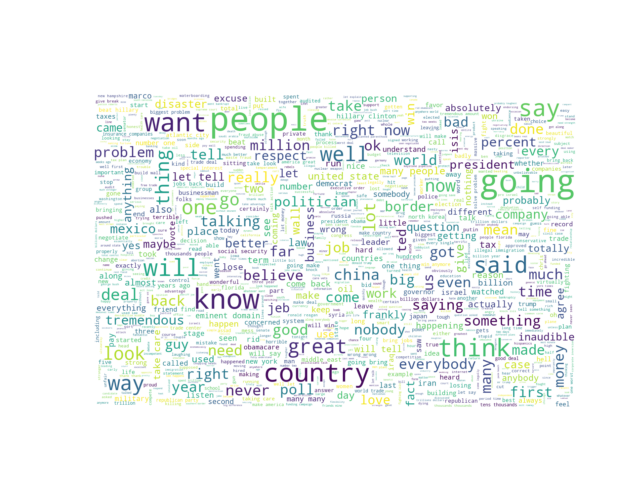

<IPython.core.display.Javascript object>


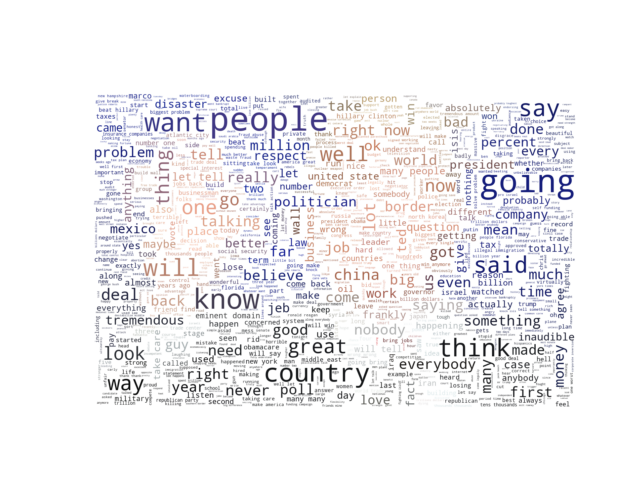

<IPython.core.display.Javascript object>


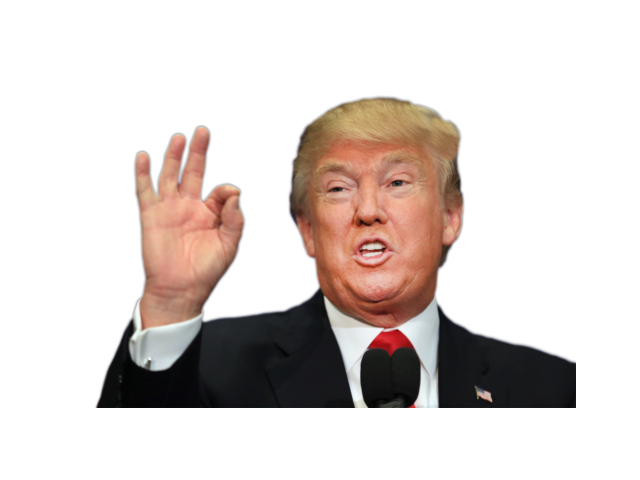

In [29]:
trump_coloring = np.array(Image.open("./data/trump-debate.png"))

#plt.imshow(wordcloud)
wc_trump = WordCloud(background_color="white", max_words=1000,
            max_font_size=100, random_state=42, mask = trump_coloring,
            stopwords=stopwords)
# generate word cloud
wc_trump.generate(donald_str)
# recolor wordcloud and show
image_colors = ImageColorGenerator(trump_coloring)

# show
plt.imshow(wc_trump, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
plt.imshow(wc_trump.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(trump_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()